In [1]:
import numpy as np
import sklearn

from matplotlib import pyplot as plt

from sklearn.neighbors import LocalOutlierFactor

In [2]:
import sys
sys.path.insert(0, "..")

import phepy

from phepy.detector import OutOfDistributionDetector, PercentileScorer
from phepy.plot import plot_all_toy_examples
from phepy.toys import ToyExample
from phepy.toys.line import LineToyExample
from phepy.toys.circle import CircleToyExample
from phepy.toys.haystack import HaystackToyExample

In [3]:
line = LineToyExample(np.random.default_rng(42))
circle = CircleToyExample(np.random.default_rng(42))
haystack = HaystackToyExample(np.random.default_rng(42))

In [4]:
class LocalOutlierFactorDetector(OutOfDistributionDetector):
    @staticmethod
    def low_score_is_low_confidence() -> bool:
        return True

    def fit(
        self, X_train: np.ndarray, Y_train: np.ndarray
    ):
        self.__X_lof = LocalOutlierFactor(novelty=True).fit(X_train)
        
        return self

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        return self.__X_lof.score_samples(X_test)

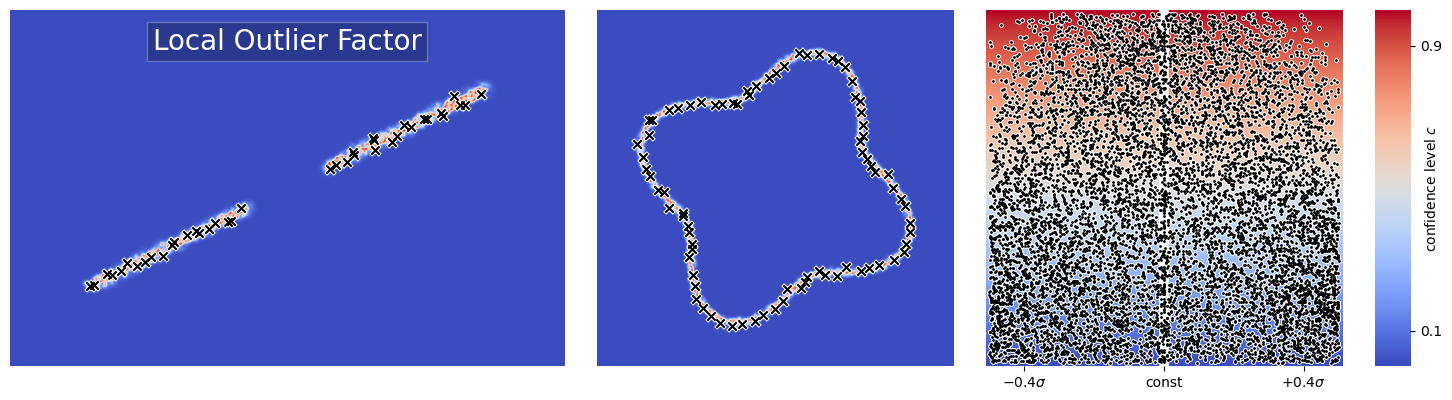

In [5]:
fig = plot_all_toy_examples(
    scorers = {
        "Local Outlier Factor": PercentileScorer(LocalOutlierFactorDetector()),
    },
    toys = [line, circle, haystack],
    cmap = "coolwarm", # use e.g. "viridis" to be colour-blind safe
)

plt.savefig("minimal.png", dpi=100)

plt.show()